start: 2020/05/05 10:51:29


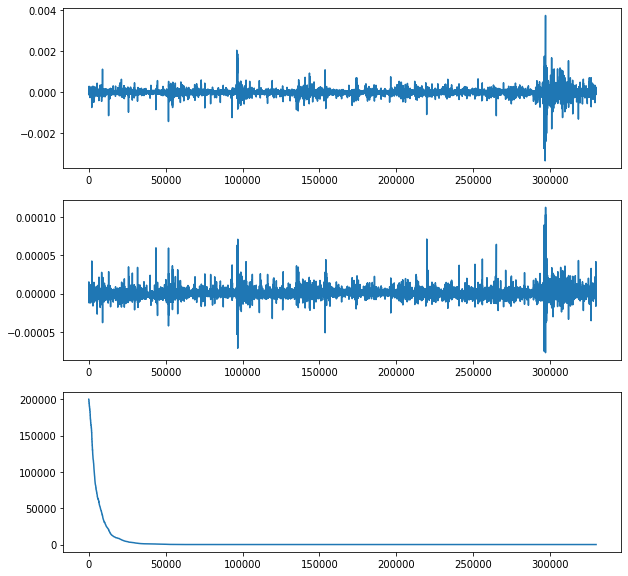

end: 2020/05/05 10:51:50


In [10]:
import pickle
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator
%matplotlib inline

def plot(b, s):
    x = b.data_test
    y_result = list(b.label_test)
    y_pred = list(b.model.predict(x))
    y_asset = list(s.simulate(b.data_test, b.model))
    
    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_pred)
    ax3.plot(list(range(len(x))), y_asset)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    csv = pd.read_csv("datasets/train_v3.csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)

    with open("models/model_v3.pickle", mode="rb") as file:
        b.model = pickle.load(file)

    b.set_train_test_dataset(0.8, 0.2)
    s = simulator.BitcoinSimulator(200000)

    plot(b, s)
    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()